In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls

Horse_Health.ipynb      submission_cat.csv      submission_ver5_lgb.csv
Untitled.ipynb          submission_ensemble.csv submission_ver5_xgb.csv
catboost_info           submission_lgb.csv      submission_xgb.csv
original.csv            submission_ver2.csv     test.csv
sample_submission.csv   submission_ver3_lgb.csv train.csv
submission.csv          submission_ver4_lgb.csv


In [3]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [4]:
original = pd.read_csv('./original.csv')
train = pd.concat([train, original], ignore_index=True)

display(train.head(5))

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


## データ内容について

（https://www.kaggle.com/datasets/yasserh/horse-survival-dataset より）

Predict whether or not a horse can survive based upon past medical conditions.

Noted by the "outcome" variable in the data.

Content:

All of the binary representation have been converted into the words they actually represent. However, a fuller description is provided by the data dictionary (datadict.txt).

There are a lot of NA's in the data. This is the real struggle here. Try to find a way around it through imputation or other means.
 
→ <b><u>過去の病状から馬が生存しているか診断する。(生存／安楽死／死亡）</u></b>

---


## 特徴量について

### 1: Surgery (c)
1 = Yes, it had surgery
2 = It was treated without surgery

### 2: Age (c)
1 = Adult horse
2 = Young (< 6 months)

### 3: Hospital Number (c)

numeric id
the case number assigned to the horse (may not be unique if the horse is treated > 1 time)
### 4: rectal temperature (n)

linear
in degrees celsius.
An elevated temp may occur due to infection.
temperature may be reduced when the animal is in late shock
normal temp is 37.8
this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock
### 5: pulse (n)
linear
the heart rate in beats per minute
is a reflection of the heart condition: 30 -40 is normal for adults
rare to have a lower than normal rate although athletic horses may have a rate of 20-25
animals with painful lesions or suffering from circulatory shock may have an elevated heart rate
### 6: respiratory rate (n)

linear
normal rate is 8 to 10
usefulness is doubtful due to the great fluctuations
### 7: temperature of extremities (c)

a subjective indication of peripheral circulation
possible values:
1 = Normal
2 = Warm
3 = Cool
4 = Cold
cool to cold extremities indicate possible shock
hot extremities should correlate with an elevated rectal temp.
### 8: peripheral pulse (c)

subjective
possible values are:
1 = normal
2 = increased
3 = reduced
4 = absent
normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion
### 9: mucous membranes (c)

a subjective measurement of colour
possible values are:
1 = normal pink
2 = bright pink
3 = pale pink
4 = pale cyanotic
5 = bright red / injected
6 = dark cyanotic
1 and 2 probably indicate a normal or slightly increased circulation
3 may occur in early shock
4 and 6 are indicative of serious circulatory compromise
5 is more indicative of a septicemia
### 10: capillary refill time (c)

a clinical judgement. The longer the refill, the poorer the circulation
possible values
1 = < 3 seconds 2 = >= 3 seconds
### 11: pain - a subjective judgement of the horse's pain level (c)

possible values:
1 = alert, no pain
2 = depressed
3 = intermittent mild pain
4 = intermittent severe pain
5 = continuous severe pain
should NOT be treated as a ordered or discrete variable!
In general, the more painful, the more likely it is to require surgery
prior treatment of pain may mask the pain level to some extent
### 12: peristalsis (c)

an indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
possible values:
1 = hypermotile
2 = normal
3 = hypomotile
4 = absent
### 13: abdominal distension (c)

An IMPORTANT parameter.
possible values
1 = none
2 = slight
3 = moderate
4 = severe
an animal with abdominal distension is likely to be painful and have reduced gut motility.
a horse with severe abdominal distension is likely to require surgery just tio relieve the pressure
### 14: nasogastric tube (c)

this refers to any gas coming out of the tube
possible values:
1 = none
2 = slight
3 = significant
a large gas cap in the stomach is likely to give the horse discomfort
### 15: nasogastric reflux (c)

possible values
1 = none
2 = > 1 liter
3 = < 1 liter
the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine
### 16: nasogastric reflux PH (n)

linear
scale is from 0 to 14 with 7 being neutral
normal values are in the 3 to 4 range
### 17: rectal examination - feces (c)

possible values
1 = normal
2 = increased
3 = decreased
4 = absent
absent feces probably indicates an obstruction
### 18: abdomen (c)

possible values
1 = normal
2 = other
3 = firm feces in the large intestine
4 = distended small intestine
5 = distended large intestine
3 is probably an obstruction caused by a mechanical impaction and is normally treated medically
4 and 5 indicate a surgical lesion
### 19: packed cell volume (n)

linear
the # of red cells by volume in the blood
normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.
### 20: total protein (n)

linear
normal values lie in the 6-7.5 (gms/dL) range
the higher the value the greater the dehydration
### 21: abdominocentesis appearance (c)

a needle is put in the horse's abdomen and fluid is obtained from
the abdominal cavity
possible values:
1 = clear
2 = cloudy
3 = serosanguinous
normal fluid is clear while cloudy or serosanguinous indicates a compromised gut
### 22: abdomcentesis total protein (n)

linear
the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL
### 23: outcome (c)  [target]

what eventually happened to the horse?
possible values:
1 = lived
2 = died
3 = was euthanized
### 24: surgical lesion? (c)

retrospectively, was the problem (lesion) surgical?
all cases are either operated upon or autopsied so that this value and the lesion type are always known
possible values:
1 = Yes
2 = No
### 25, 26, 27: type of lesion (c)

first number is site of lesion
1 = gastric
2 = sm intestine
3 = lg colon
4 = lg colon and cecum
5 = cecum
6 = transverse colon
7 = retum/descending colon
8 = uterus
9 = bladder
11 = all intestinal sites
00 = none
second number is type
1 = simple
2 = strangulation
3 = inflammation
4 = other
third number is subtype
1 = mechanical
2 = paralytic
0 = n/a
fourth number is specific code
1 = obturation
2 = intrinsic
3 = extrinsic
4 = adynamic
5 = volvulus/torsion
6 = intussuption
7 = thromboembolic
8 = hernia
9 = lipoma/slenic incarceration
10 = displacement
0 = n/a
### 28: cp_data (c)
is pathology data present for this case?
1 = Yes
2 = No
this variable is of no significance since pathology data is not included or collected for these cases

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1534 non-null   object 
 1   age                    1534 non-null   object 
 2   hospital_number        1534 non-null   int64  
 3   rectal_temp            1474 non-null   float64
 4   pulse                  1510 non-null   float64
 5   respiratory_rate       1476 non-null   float64
 6   temp_of_extremities    1439 non-null   object 
 7   peripheral_pulse       1405 non-null   object 
 8   mucous_membrane        1466 non-null   object 
 9   capillary_refill_time  1496 non-null   object 
 10  pain                   1435 non-null   object 
 11  peristalsis            1470 non-null   object 
 12  abdominal_distention   1455 non-null   object 
 13  nasogastric_tube       1350 non-null   object 
 14  nasogastric_reflux     1407 non-null   object 
 15  naso

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 1235 to 2058
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                824 non-null    object 
 1   age                    824 non-null    object 
 2   hospital_number        824 non-null    int64  
 3   rectal_temp            824 non-null    float64
 4   pulse                  824 non-null    float64
 5   respiratory_rate       824 non-null    float64
 6   temp_of_extremities    789 non-null    object 
 7   peripheral_pulse       777 non-null    object 
 8   mucous_membrane        811 non-null    object 
 9   capillary_refill_time  818 non-null    object 
 10  pain                   795 non-null    object 
 11  peristalsis            805 non-null    object 
 12  abdominal_distention   802 non-null    object 
 13  nasogastric_tube       760 non-null    object 
 14  nasogastric_reflux     810 non-null    object 
 15  nasogas

## EDA

In [7]:
train.isnull().sum().sort_values(ascending=False)

abdomen                  331
rectal_exam_feces        292
nasogastric_reflux_ph    246
abdomo_appearance        213
abdomo_protein           198
nasogastric_tube         184
peripheral_pulse         129
nasogastric_reflux       127
pain                      99
temp_of_extremities       95
abdominal_distention      79
mucous_membrane           68
peristalsis               64
rectal_temp               60
respiratory_rate          58
capillary_refill_time     38
total_protein             33
packed_cell_volume        29
pulse                     24
lesion_1                   0
lesion_3                   0
cp_data                    0
lesion_2                   0
surgery                    0
surgical_lesion            0
age                        0
hospital_number            0
outcome                    0
dtype: int64

### 数値変数について

In [8]:
num_columns = train.select_dtypes(include=[int, float]).columns
print(f'before num_cols: {num_columns}')

# hospital_number, lesion_n はcategoricalなので除外
num_cat_columns = ['hospital_number', 'lesion_1', 'lesion_2', 'lesion_3']
num_columns = train.drop(num_cat_columns, axis=1).select_dtypes(include=[int, float]).columns

train[num_columns].describe()

before num_cols: Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein',
       'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein
count,1474.000000,1510.000000,1476.000000,1288.000000,1505.000000,1501.000000,1336.000000
mean,38.196744,78.194702,30.120596,4.395963,49.011296,21.899534,3.271931
std,0.779883,29.162518,16.650801,1.939516,10.590426,26.813063,1.621415
min,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000
25%,37.800000,52.000000,18.000000,2.000000,42.000000,6.600000,2.000000
50%,38.200000,72.000000,28.000000,4.500000,48.000000,7.500000,3.000000
75%,38.600000,96.000000,36.000000,6.200000,55.000000,13.000000,4.300000
max,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000


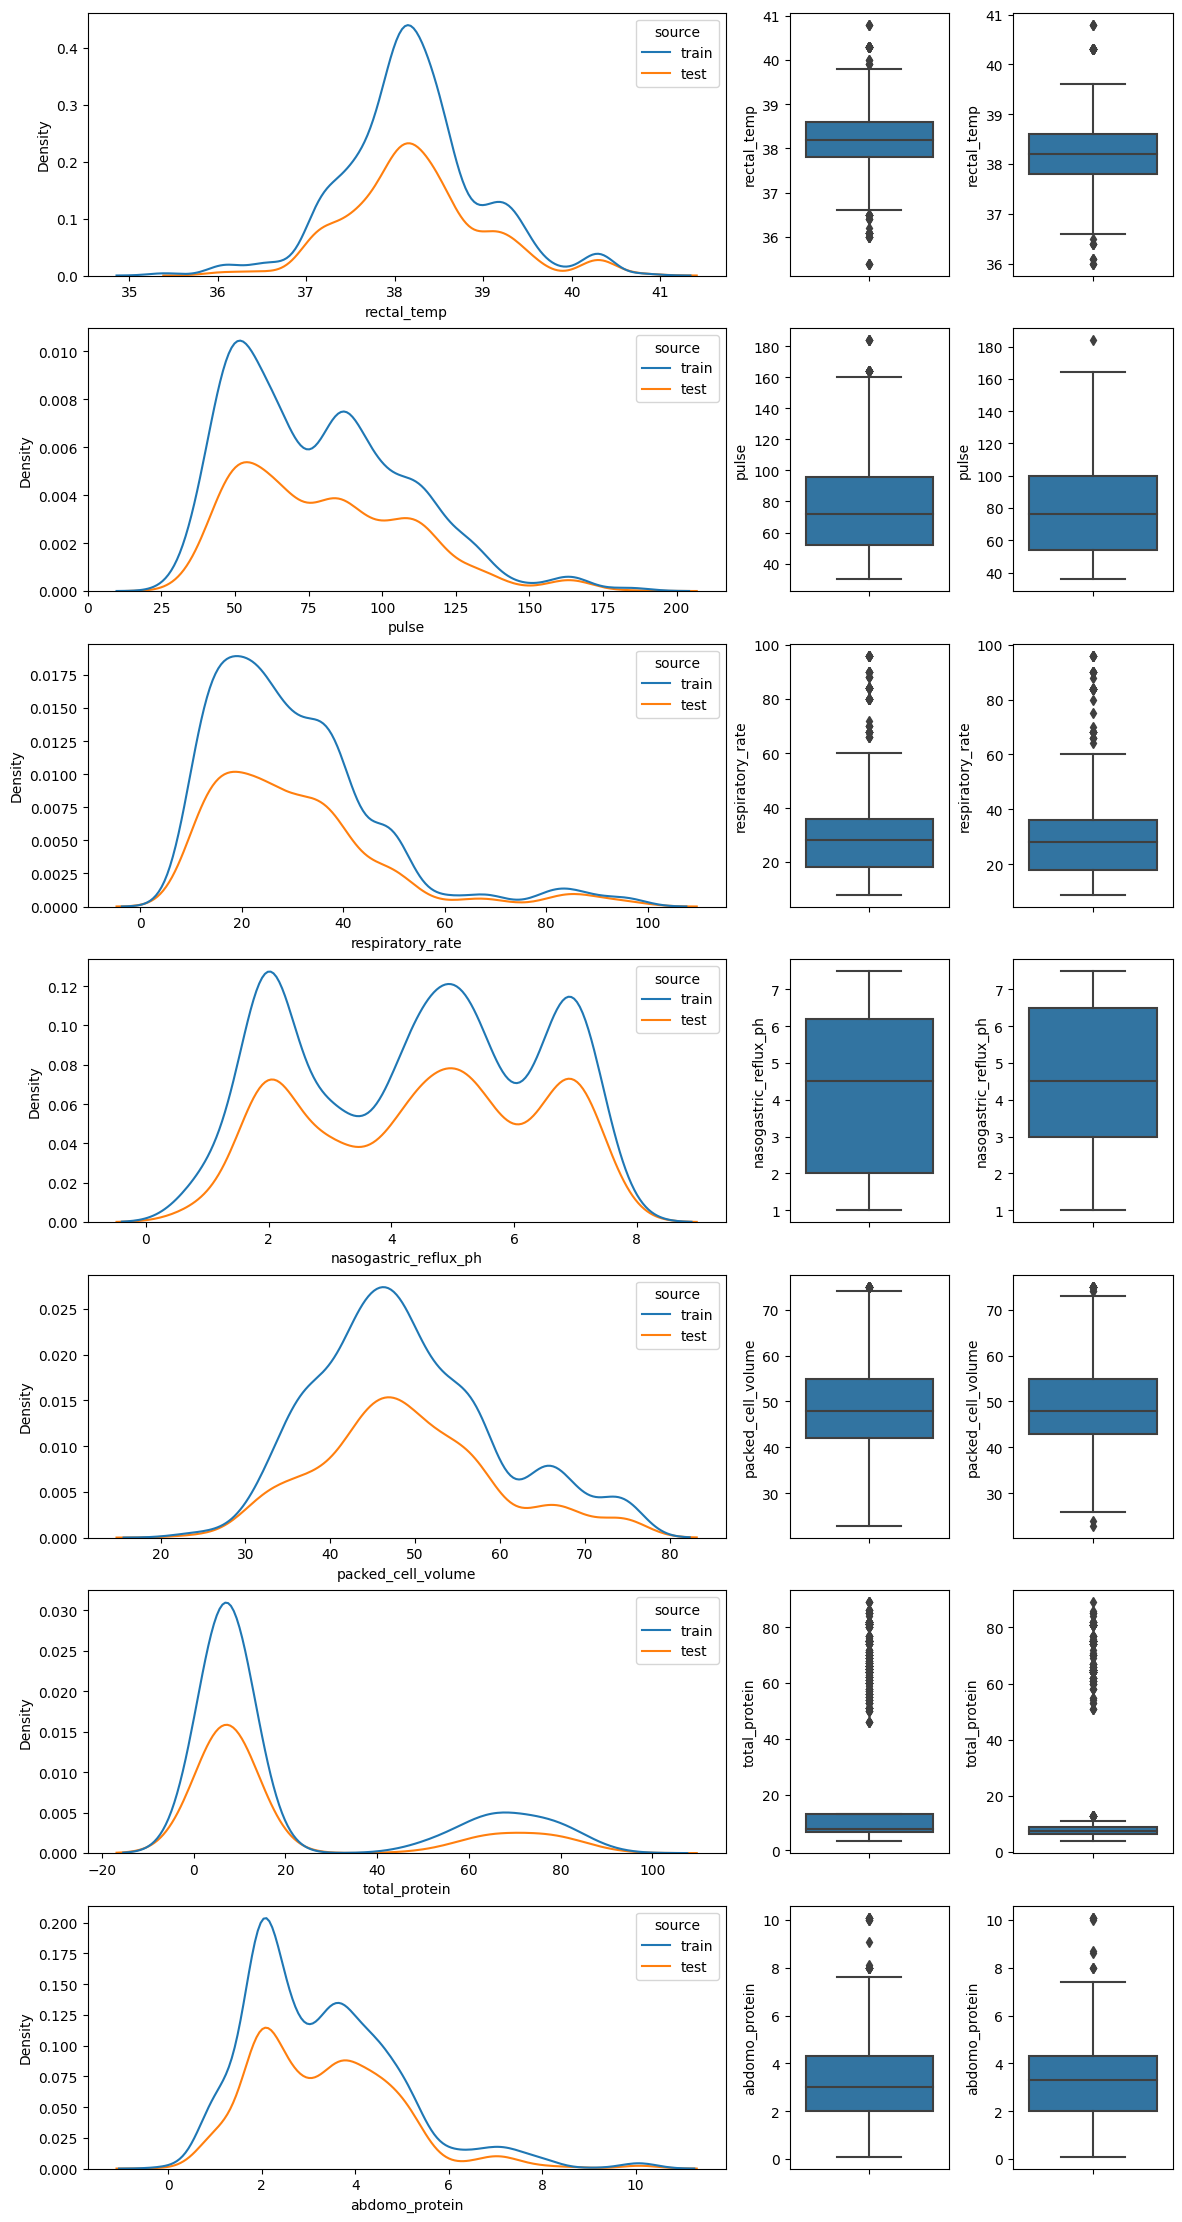

In [9]:
# train data, test dataにおける数値特徴量の分布確認

df = pd.concat([train[num_columns].assign(source='train'), test[num_columns].assign(source='test')], ignore_index=True)

fig, axes = plt.subplots(len(num_columns), 3, figsize=(14, len(num_columns)*4), gridspec_kw={'width_ratios': [4, 1, 1]})
for i, col in enumerate(num_columns):
    ax = axes[i, 0]
    sns.kdeplot(data=df[[col, 'source']], x=col, hue='source', warn_singular=False, ax=ax)
    
    ax = axes[i, 1]
    sns.boxplot(data=df[df['source'] == 'train'], y=col, ax=ax)
    
    ax = axes[i, 2]
    sns.boxplot(data=df[df['source'] == 'test'], y=col, ax=ax)
    
plt.show()

→ train, testデータはほぼ同じ分布形態。データ数が少ないがモデルの適合がしやすそう。

---

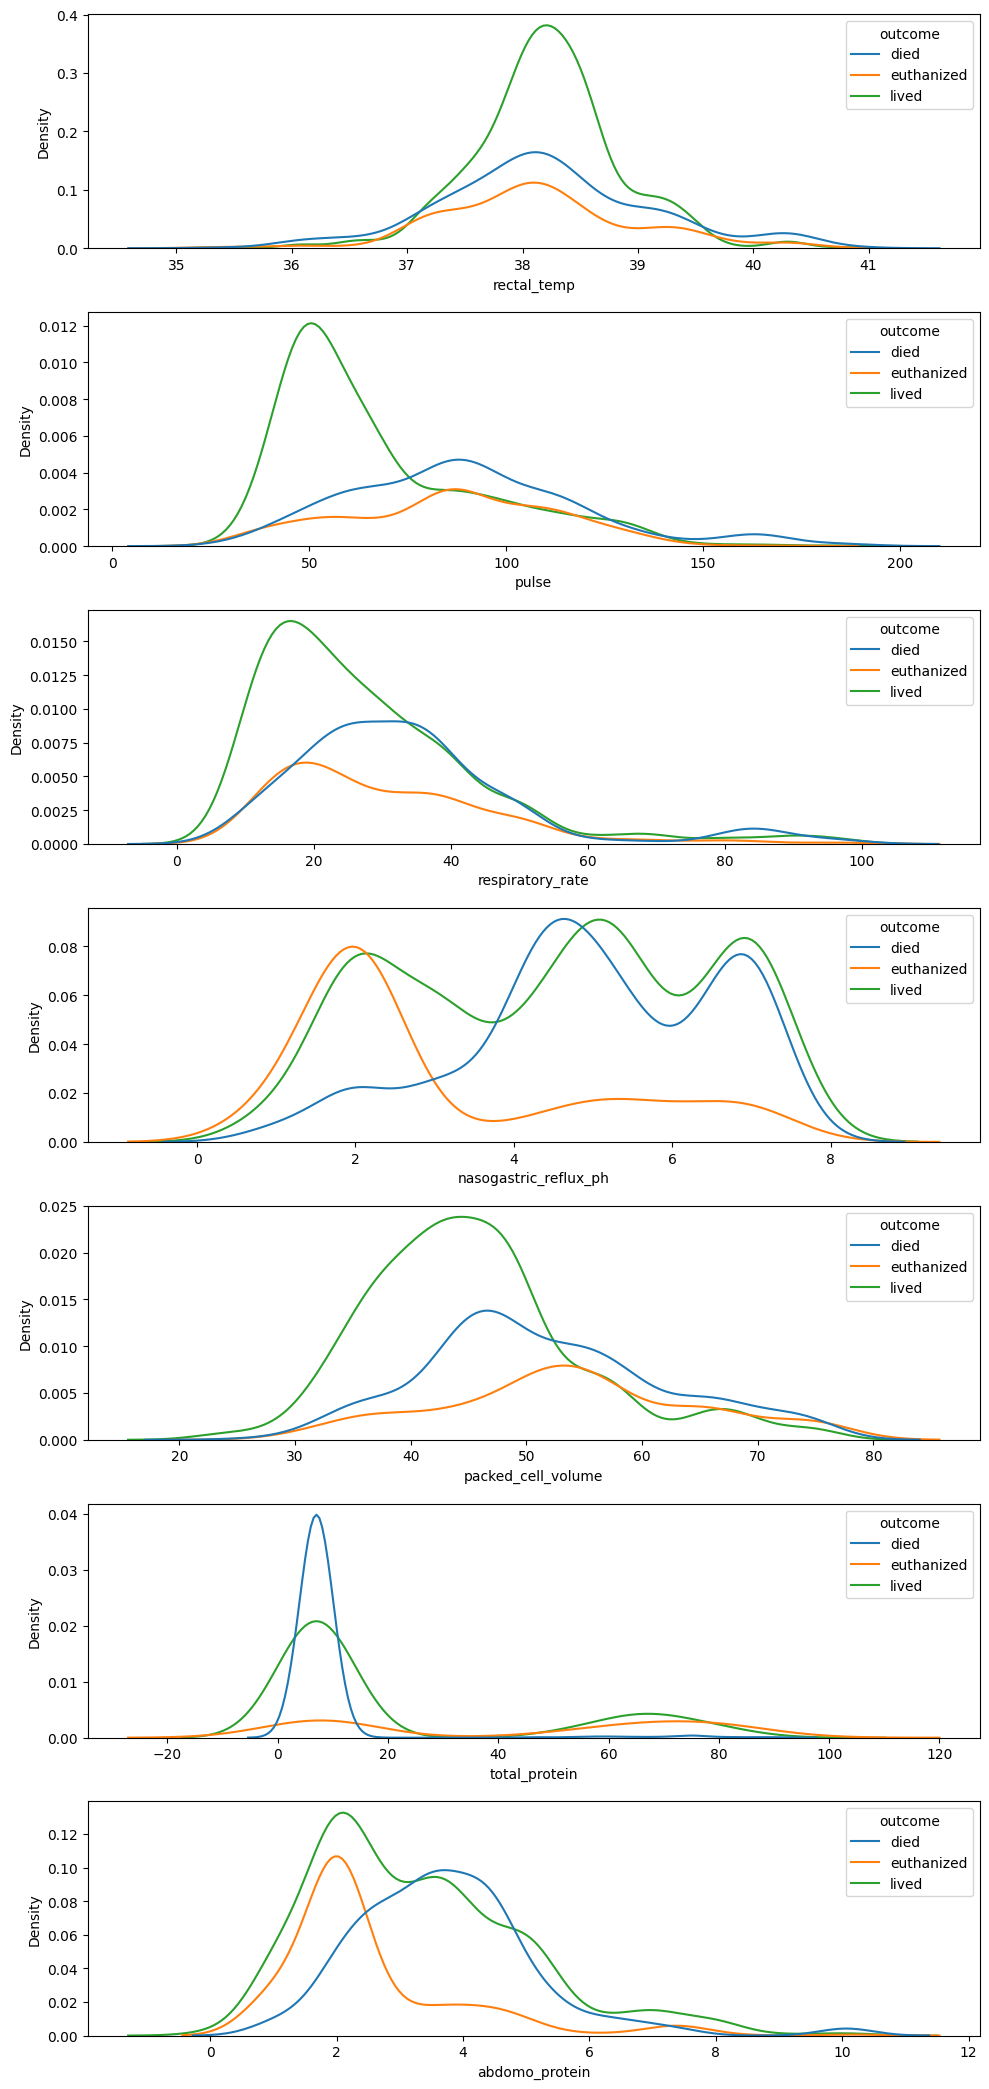

In [10]:
# target 'outcome' 別の数値データ分布

df = pd.concat([train[num_columns], train['outcome']], axis=1)
fig, axes = plt.subplots(len(num_columns), 1, figsize=(10, len(num_columns)*3))

for i, col in enumerate(num_columns):
    ax = axes[i]
    sns.kdeplot(data=df, x=col, hue='outcome', warn_singular=False, ax=ax)

plt.tight_layout()
plt.show()

'pulse'：脈拍<br>
→速いほど死亡率増加と考察。

'nasagostric_reflux_ph'：経鼻胃（鼻からチューブで栄養を取る）の逆流PH<br>
→ euthanizedのみpH=2ほどで特徴的。

'abdomo_protein':腹腔タンパク<br>
→ 説明より多いと腸内環境が悪い。死亡率に相関がありそう。

---

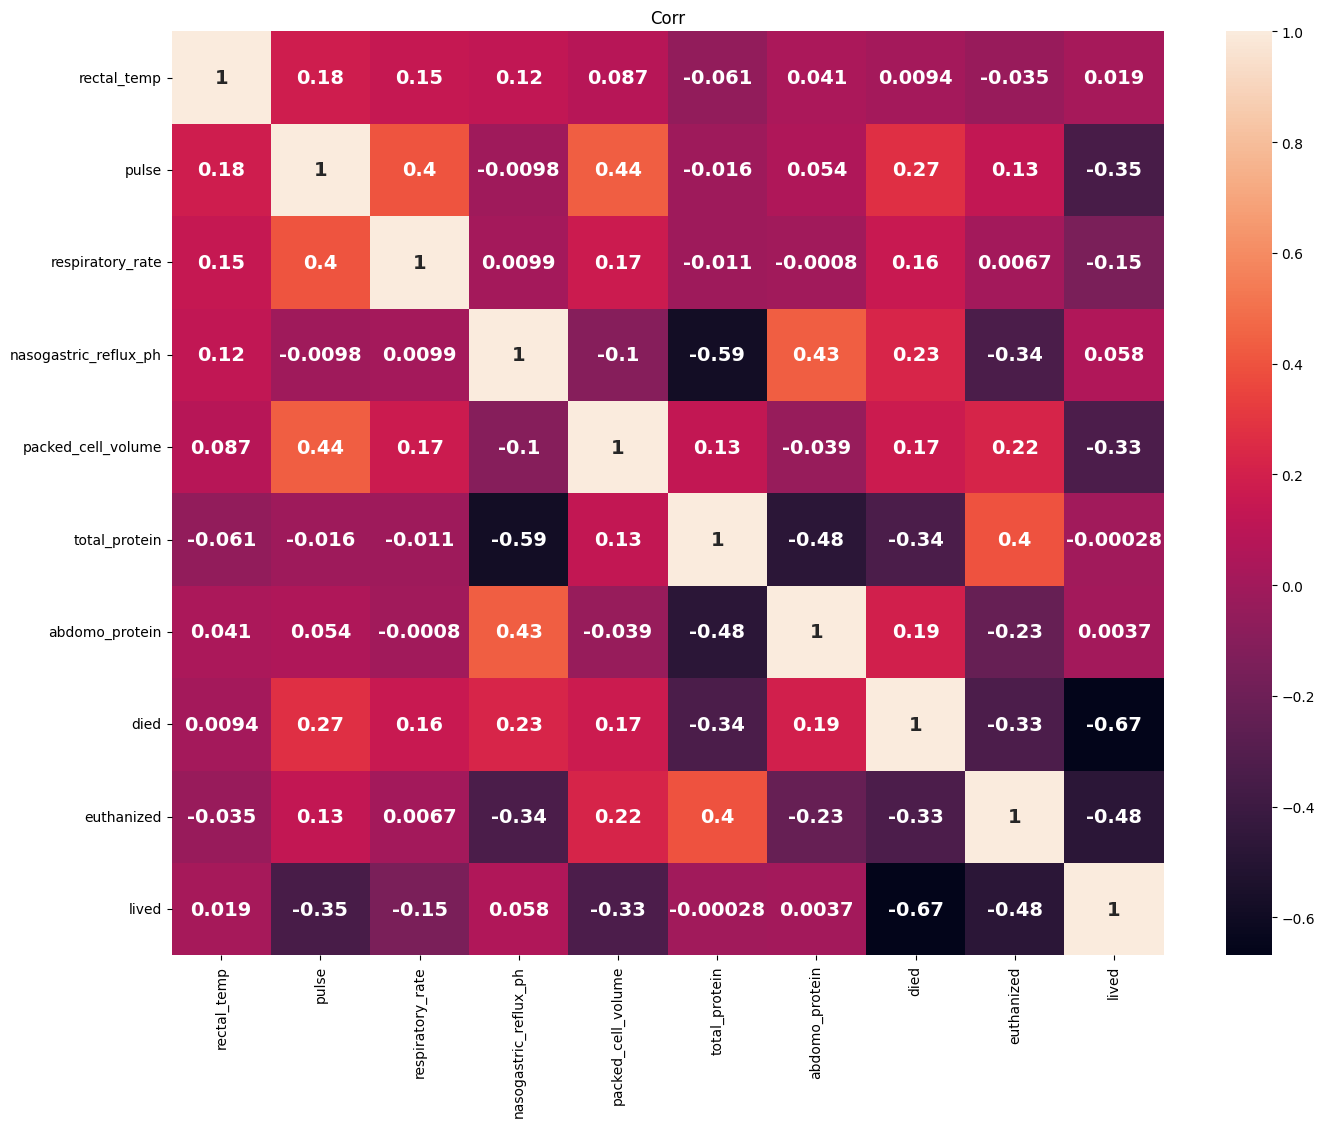

In [11]:
# 'outcome'をダミー変数化して各特徴量との相関関係を確認
dummy_outcome = pd.get_dummies(train['outcome'])
corr = pd.concat([train[num_columns], dummy_outcome], axis=1).corr()

plt.figure(figsize=(16, 12))
sns.heatmap(data=corr, annot=True, annot_kws={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Corr')
plt.show()

→ target('outcome')に対して有意に大きい相関を持つ特徴量はない。(<=0.35)<br>
また、特徴量同士に関しても線形相関を持つものはない(<=0.59)ので、新規特徴量の作成は今回行わない。

---

###　カテゴリ変数について

In [12]:
# lesion_n のカテゴリを分類しなおす必要がある

lesion_n = ['lesion_1', 'lesion_2', 'lesion_3']
train_lesion = train[lesion_n]
test_lesion = test[lesion_n]
display('lesion_n of train', train_lesion.head(10),'lesion_n of test', test_lesion.head(10))


'lesion_n of train'

,lesion_1,lesion_2,lesion_3
0,2209,0,0
1,2208,0,0
2,5124,0,0
3,2208,0,0
4,0,0,0
5,0,0,0
6,3111,0,0
7,2207,0,0
8,0,0,0
9,3209,0,0


'lesion_n of test'

,lesion_1,lesion_2,lesion_3
id,,,
1235,0,0,0
1236,2208,0,0
1237,2205,0,0
1238,1400,0,0
1239,2208,0,0
1240,2207,0,0
1241,2209,0,0
1242,2209,0,0
1243,4205,0,0


データの説明を見るに、4桁ないし5桁の数字は各位がそれぞれ別の意味を持つので同一列に存在していてはならない。よって、それぞれの数字を分割して別々の列に再度入れ直す。

In [13]:
train_lesion_categorized = pd.DataFrame()
test_lesion_categorized = pd.DataFrame()

# lesion_nを(1-2, 3, 4, 5桁目)で分割して分類
for i, lesion in enumerate(lesion_n):
    lesion_str = train[lesion].apply(lambda x: str(x).zfill(5))
    tmp_df = lesion_str.str.extract('(\d\d)(\d)(\d)(\d)')
    tmp_df.columns = [f'lesion_{i+1}_1', f'lesion_{i+1}_2', f'lesion_{i+1}_3', f'lesion_{i+1}_4']
    train_lesion_categorized = pd.concat([train_lesion_categorized, tmp_df], axis=1)
    
for i, lesion in enumerate(lesion_n):
    lesion_str = test[lesion].apply(lambda x: str(x).zfill(5))
    tmp_df = lesion_str.str.extract('(\d\d)(\d)(\d)(\d)')
    tmp_df.columns = [f'lesion_{i+1}_1', f'lesion_{i+1}_2', f'lesion_{i+1}_3', f'lesion_{i+1}_4']
    test_lesion_categorized = pd.concat([test_lesion_categorized, tmp_df], axis=1)

train_lesion_categorized.head(10)

,lesion_1_1,lesion_1_2,lesion_1_3,lesion_1_4,lesion_2_1,lesion_2_2,lesion_2_3,lesion_2_4,lesion_3_1,lesion_3_2,lesion_3_3,lesion_3_4
0,02,2,0,9,00,0,0,0,00,0,0,0
1,02,2,0,8,00,0,0,0,00,0,0,0
2,05,1,2,4,00,0,0,0,00,0,0,0
3,02,2,0,8,00,0,0,0,00,0,0,0
4,00,0,0,0,00,0,0,0,00,0,0,0
5,00,0,0,0,00,0,0,0,00,0,0,0
6,03,1,1,1,00,0,0,0,00,0,0,0
7,02,2,0,7,00,0,0,0,00,0,0,0
8,00,0,0,0,00,0,0,0,00,0,0,0
9,03,2,0,9,00,0,0,0,00,0,0,0


In [14]:
# 個数確認
display(pd.DataFrame(train_lesion_categorized[['lesion_1_1', 'lesion_1_2', 'lesion_1_3', 'lesion_1_4']].value_counts()))
display(pd.DataFrame(train_lesion_categorized[['lesion_2_1', 'lesion_2_2', 'lesion_2_3', 'lesion_2_4']].value_counts()))
display(pd.DataFrame(train_lesion_categorized[['lesion_3_1', 'lesion_3_2', 'lesion_3_3', 'lesion_3_4']].value_counts()))

count
lesion_1_1 lesion_1_2 lesion_1_3 lesion_1_4       
02         2          0          8             172
00         0          0          0             150
03         2          0          5             145
           1          1          1             123
02         2          0          5             117
...                                            ...
07         1          1          3               1
04         1          2          2               1
03         4          0          0               1
02         2          0          2               1
04         1          1          1               1

[62 rows x 1 columns]

count
lesion_2_1 lesion_2_2 lesion_2_3 lesion_2_4       
00         0          0          0            1519
01         4          0          0               5
03         1          1          1               5
                                 2               3
06         1          1          2               1
07         1          1          1               1

,,,,count
lesion_3_1,lesion_3_2,lesion_3_3,lesion_3_4,
00,0,0,0,1531
02,2,0,9,3


In [15]:
# train data, test dataに処理済みの'lesion'を再結合
train_drop_lesion = train.drop(lesion_n, axis=1)
train_cat = pd.concat([train_drop_lesion.drop(num_columns, axis=1), train_lesion_categorized], axis=1)

test_drop_lesion = test.drop(lesion_n, axis=1)
test_cat = pd.concat([test_drop_lesion.drop(num_columns, axis=1), test_lesion_categorized], axis=1)

display(train_cat.head(10))
print(train_cat.info())
print(test_cat.info())

,surgery,age,hospital_number,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,lesion_1_3,lesion_1_4,lesion_2_1,lesion_2_2,lesion_2_3,lesion_2_4,lesion_3_1,lesion_3_2,lesion_3_3,lesion_3_4
0,yes,adult,530001,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,...,0,9,00,0,0,0,00,0,0,0
1,yes,adult,533836,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,...,0,8,00,0,0,0,00,0,0,0
2,yes,adult,529812,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,...,2,4,00,0,0,0,00,0,0,0
3,yes,adult,5262541,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,...,0,8,00,0,0,0,00,0,0,0
4,no,adult,5299629,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,...,0,0,00,0,0,0,00,0,0,0
5,no,adult,529642,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,...,0,0,00,0,0,0,00,0,0,0
6,yes,adult,534787,cool,reduced,normal_pink,less_3_sec,severe_pain,normal,slight,...,1,1,00,0,0,0,00,0,0,0
7,no,adult,529461,cool,reduced,pale_cyanotic,more_3_sec,mild_pain,hypomotile,moderate,...,0,7,00,0,0,0,00,0,0,0
8,no,adult,528742,cool,reduced,normal_pink,less_3_sec,alert,hypermotile,slight,...,0,0,00,0,0,0,00,0,0,0
9,yes,adult,529640,cool,reduced,pale_pink,less_3_sec,depressed,absent,moderate,...,0,9,00,0,0,0,00,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   surgery                1534 non-null   object
 1   age                    1534 non-null   object
 2   hospital_number        1534 non-null   int64 
 3   temp_of_extremities    1439 non-null   object
 4   peripheral_pulse       1405 non-null   object
 5   mucous_membrane        1466 non-null   object
 6   capillary_refill_time  1496 non-null   object
 7   pain                   1435 non-null   object
 8   peristalsis            1470 non-null   object
 9   abdominal_distention   1455 non-null   object
 10  nasogastric_tube       1350 non-null   object
 11  nasogastric_reflux     1407 non-null   object
 12  rectal_exam_feces      1242 non-null   object
 13  abdomen                1203 non-null   object
 14  abdomo_appearance      1321 non-null   object
 15  surgical_lesion      

In [16]:
# 'hospital number' はカテゴリのため、object型にする
train_cat['hospital_number'] = train_cat['hospital_number'].apply(lambda x: str(x))
test_cat['hospital_number'] = test_cat['hospital_number'].apply(lambda x: str(x))

# trainに含まれるtarget列を消しておく
cat_columns = train_cat.drop('outcome', axis=1).select_dtypes(include=['object']).columns
print(cat_columns)

Index(['surgery', 'age', 'hospital_number', 'temp_of_extremities',
       'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain',
       'peristalsis', 'abdominal_distention', 'nasogastric_tube',
       'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
       'abdomo_appearance', 'surgical_lesion', 'cp_data', 'lesion_1_1',
       'lesion_1_2', 'lesion_1_3', 'lesion_1_4', 'lesion_2_1', 'lesion_2_2',
       'lesion_2_3', 'lesion_2_4', 'lesion_3_1', 'lesion_3_2', 'lesion_3_3',
       'lesion_3_4'],
      dtype='object')


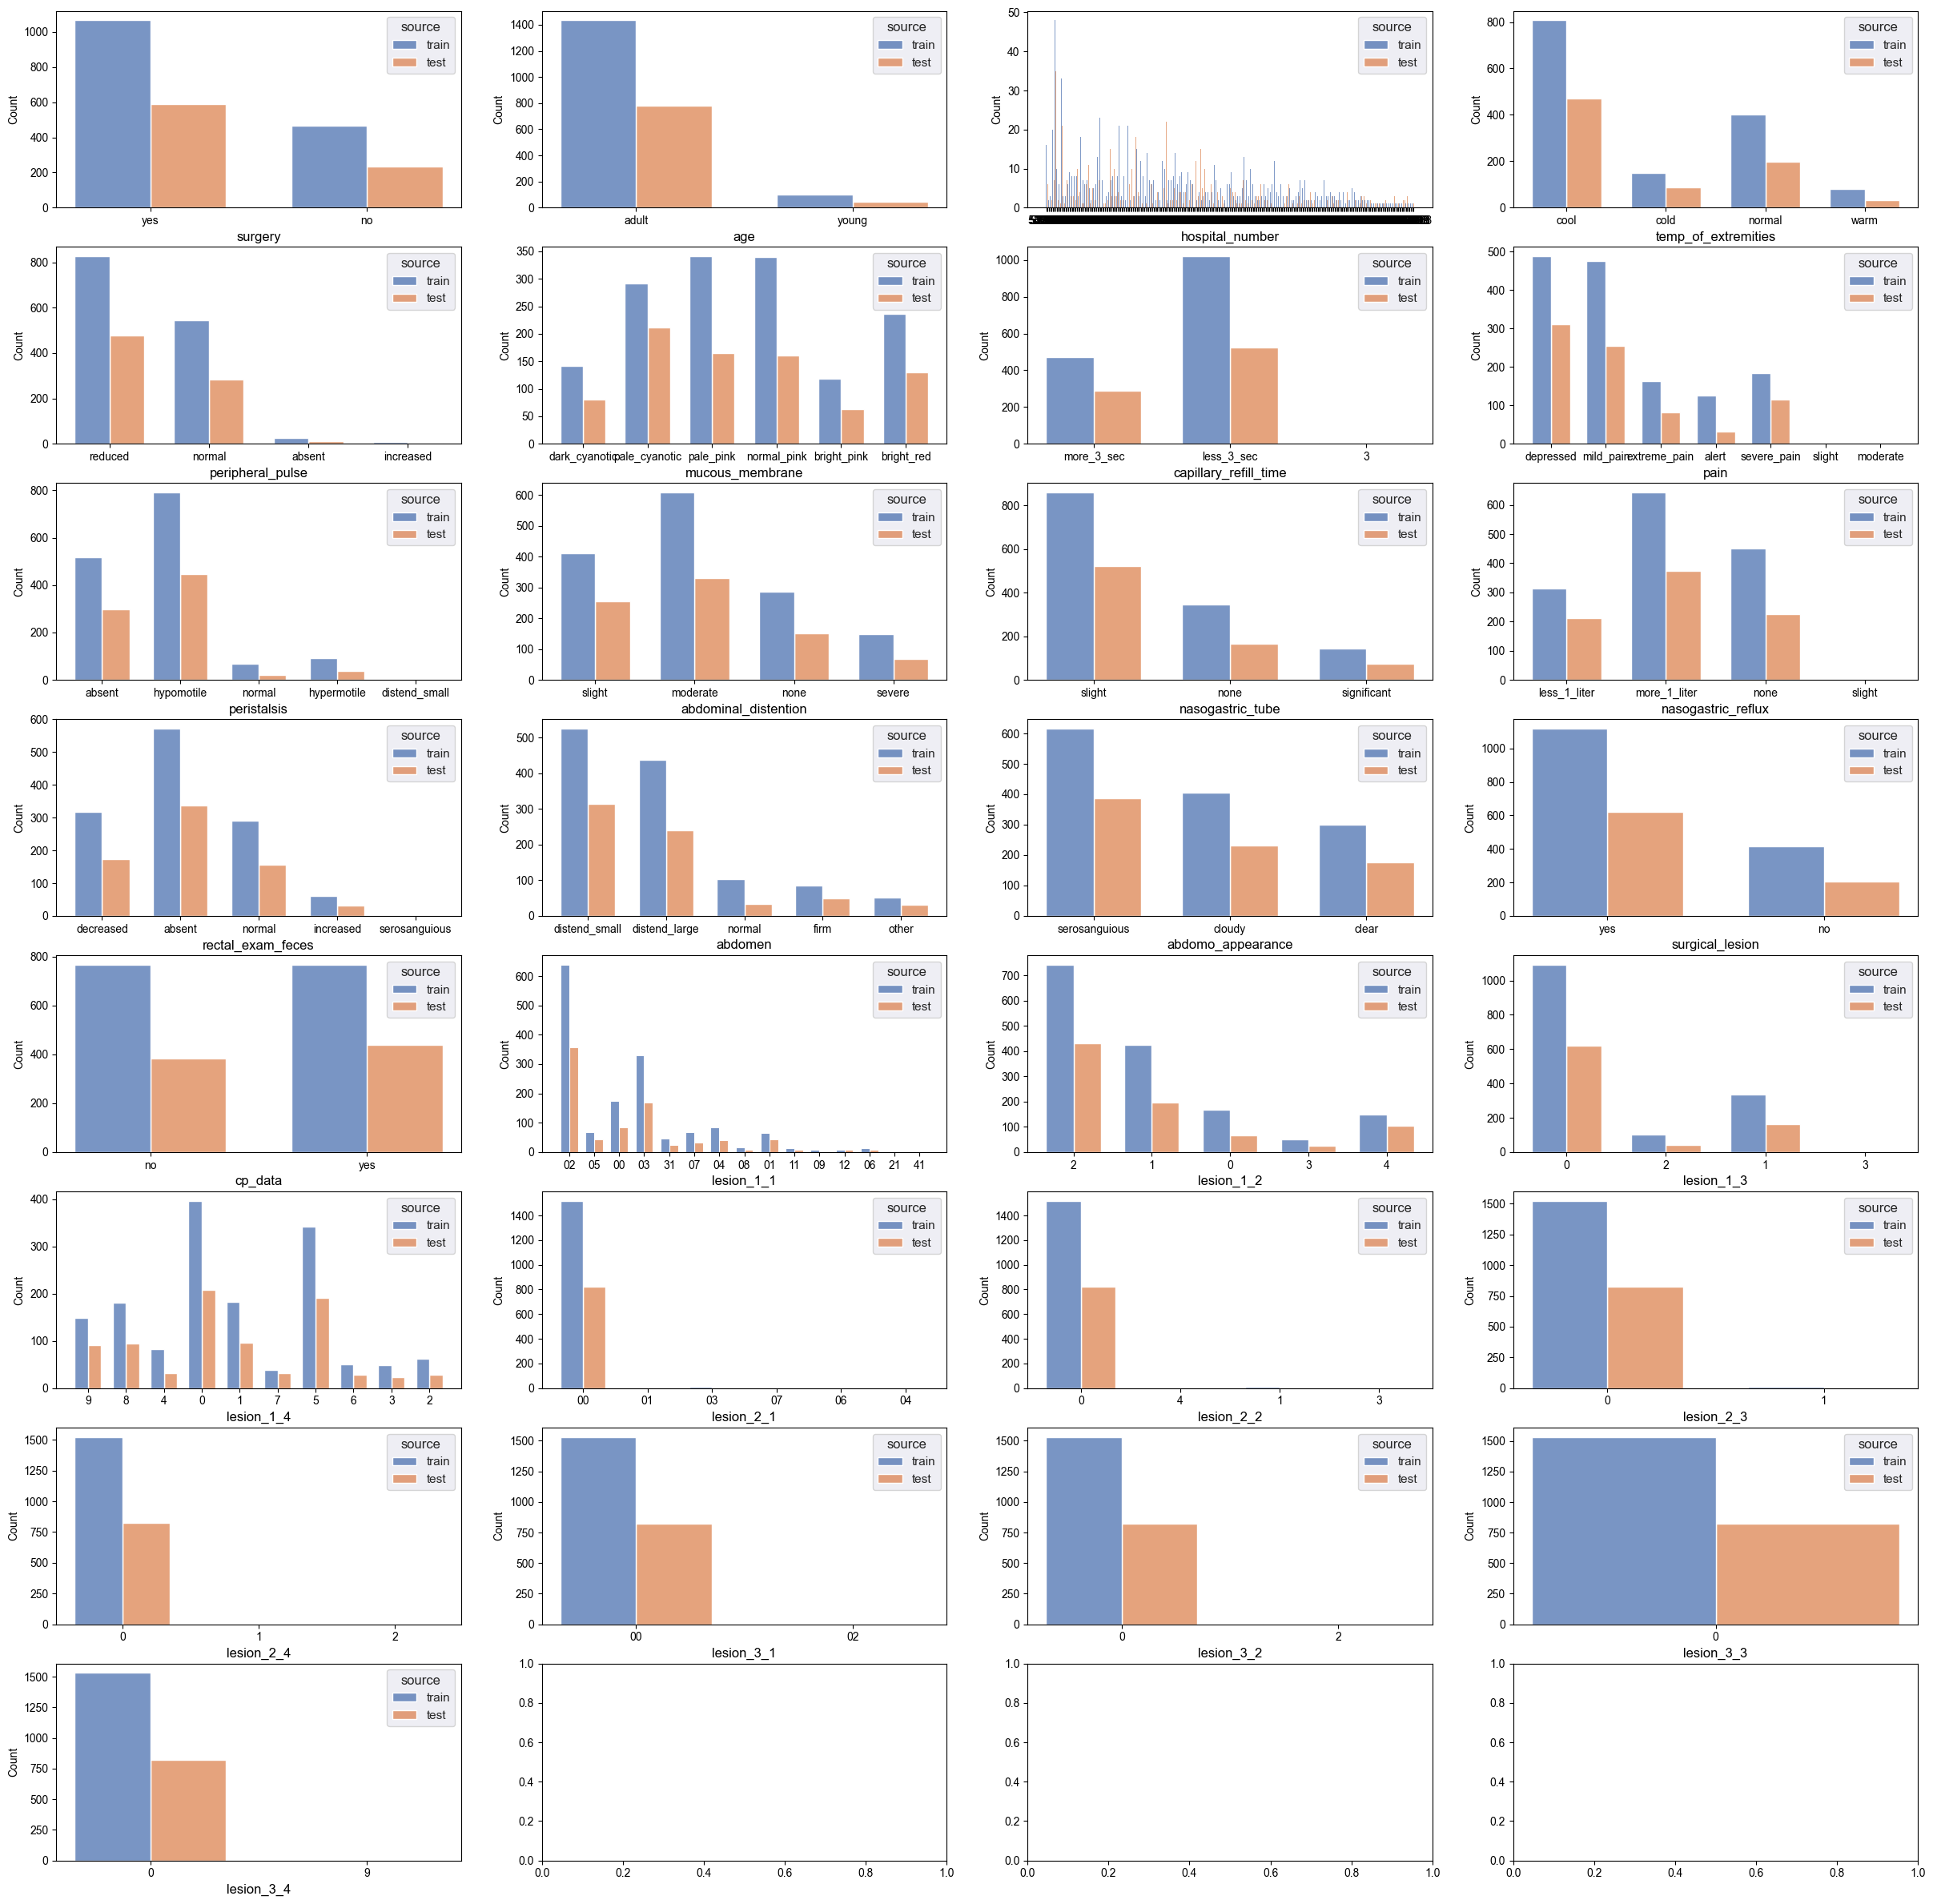

In [17]:
# train data, test dataの分布確認
df_cat = pd.concat([train_cat[cat_columns].assign(source = 'train'), test_cat[cat_columns].assign(source='test')], ignore_index=True)

fig, axes = plt.subplots(len(cat_columns)//4+ 1, 4, figsize=(30, 30))
sns.set()

for i, col in enumerate(cat_columns):
    ax = axes[i//4, i%4]
    ax.set_xlabel("", fontsize=12)
    sns.histplot(df_cat[[col, 'source']], x=col, hue='source', multiple='dodge', shrink=.7, ax=ax)

→ 'hospital_number'を除いて、train, testの両方に関して分布がかなり類似している。<br>
ただし、同じ病院での診察が多く見られることから特徴量に含めてモデル作成する。

<追記>
'hospital_number'はかなり高次のカテゴリになるため、ノイズになる可能性を鑑みてversion4において特徴量から一度削除したが、lightgbmの精度向上に必要と判断したため再度特徴量に含めることにする。

,surgery,age,hospital_number,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,...,lesion_1_3,lesion_1_4,lesion_2_1,lesion_2_2,lesion_2_3,lesion_2_4,lesion_3_1,lesion_3_2,lesion_3_3,lesion_3_4
0,yes,adult,530001,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,...,0,9,00,0,0,0,00,0,0,0
1,yes,adult,533836,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,...,0,8,00,0,0,0,00,0,0,0
2,yes,adult,529812,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,...,2,4,00,0,0,0,00,0,0,0
3,yes,adult,5262541,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,...,0,8,00,0,0,0,00,0,0,0
4,no,adult,5299629,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,...,0,0,00,0,0,0,00,0,0,0
5,no,adult,529642,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,...,0,0,00,0,0,0,00,0,0,0
6,yes,adult,534787,cool,reduced,normal_pink,less_3_sec,severe_pain,normal,slight,...,1,1,00,0,0,0,00,0,0,0
7,no,adult,529461,cool,reduced,pale_cyanotic,more_3_sec,mild_pain,hypomotile,moderate,...,0,7,00,0,0,0,00,0,0,0
8,no,adult,528742,cool,reduced,normal_pink,less_3_sec,alert,hypermotile,slight,...,0,0,00,0,0,0,00,0,0,0
9,yes,adult,529640,cool,reduced,pale_pink,less_3_sec,depressed,absent,moderate,...,0,9,00,0,0,0,00,0,0,0


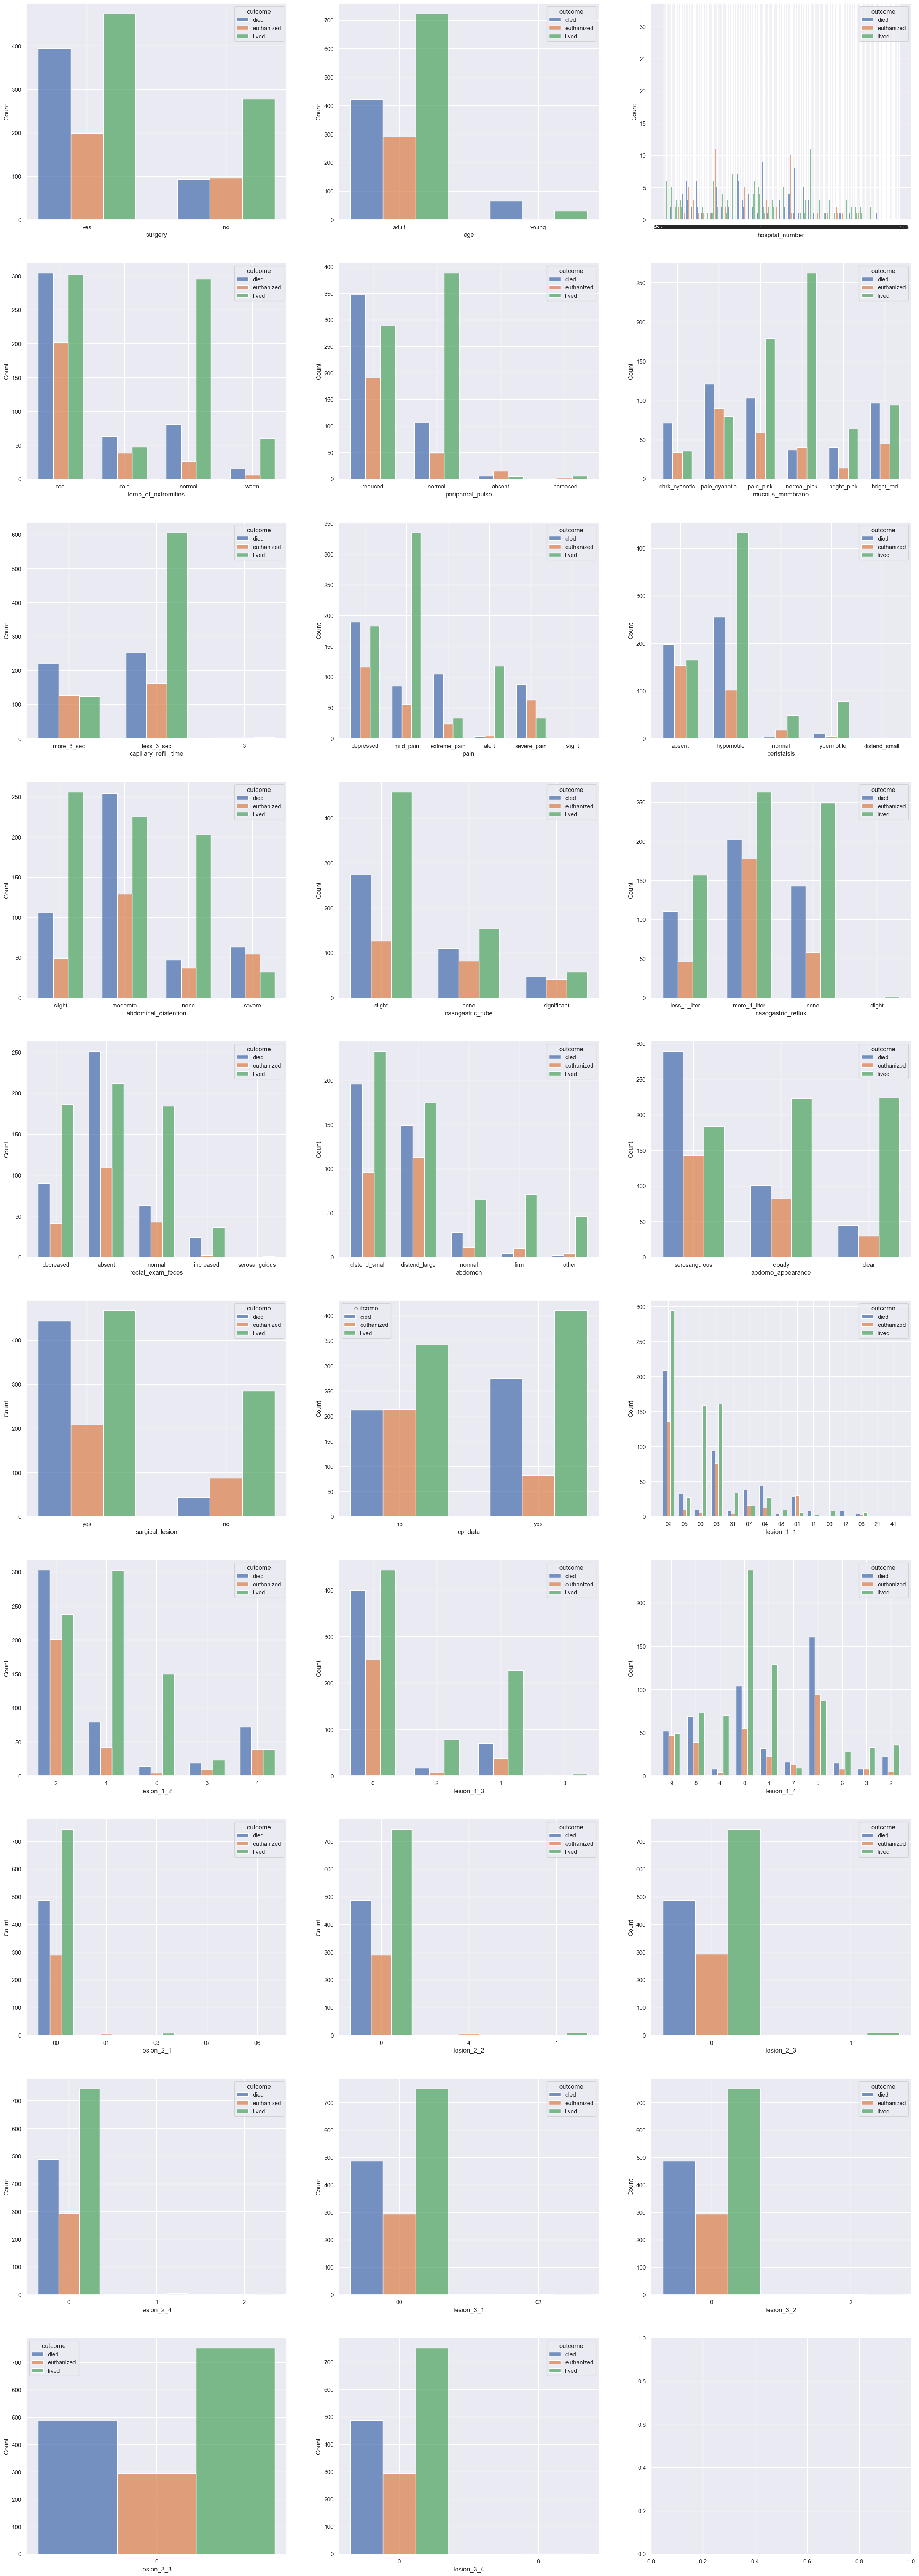

In [18]:
# 'outcome'との相関関係

df_tmp = pd.concat([train_cat], axis=1)
fig, axes = plt.subplots(len(cat_columns)//3 + 1, 3, figsize=(30, len(cat_columns)*3))

display(df_tmp.head(10))
for i, col in enumerate(cat_columns):
    ax = axes[i//3, i%3]
    sns.histplot(df_tmp[[col, 'outcome']], x=col, hue='outcome', multiple='dodge', shrink=.7, ax=ax)

→ 基本は相関がないが、'abdominal_distention' 'rectal_exam_laces''admono_appearance'などはカテゴリによって傾向が顕著に出ている。<br>
また当然ながら、'lesion_1_1'が00のときは圧倒的にlivedが高いことがわかる。<br>
また、'lesion_2'と'lesion_3'についてはデータの偏りが高すぎるため、特徴量から削除する。

## Preprocessing

In [19]:
X_train = pd.concat([train[num_columns], train_cat[cat_columns]], axis=1)
X_test = pd.concat([test[num_columns], test_cat[cat_columns]], axis=1)

y_train = train[['outcome']]

display(X_train.head(5))
display(X_test.head(5))

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgery,age,hospital_number,...,lesion_1_3,lesion_1_4,lesion_2_1,lesion_2_2,lesion_2_3,lesion_2_4,lesion_3_1,lesion_3_2,lesion_3_3,lesion_3_4
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,yes,adult,530001,...,0,9,00,0,0,0,00,0,0,0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,yes,adult,533836,...,0,8,00,0,0,0,00,0,0,0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,yes,adult,529812,...,2,4,00,0,0,0,00,0,0,0
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,yes,adult,5262541,...,0,8,00,0,0,0,00,0,0,0
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,no,adult,5299629,...,0,0,00,0,0,0,00,0,0,0


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgery,age,hospital_number,...,lesion_1_3,lesion_1_4,lesion_2_1,lesion_2_2,lesion_2_3,lesion_2_4,lesion_3_1,lesion_3_2,lesion_3_3,lesion_3_4
id,,,,,,,,,,,,,,,,,,,,,
1235,38.6,40.0,20.0,7.0,42.0,7.5,2.3,no,adult,534053,...,0,0,00,0,0,0,00,0,0,0
1236,38.2,112.0,48.0,3.5,44.0,6.0,2.6,yes,adult,528469,...,0,8,00,0,0,0,00,0,0,0
1237,37.7,66.0,12.0,3.0,31.5,6.0,1.6,yes,adult,528178,...,0,5,00,0,0,0,00,0,0,0
1238,37.1,88.0,20.0,2.0,75.0,81.0,1.0,no,adult,534784,...,0,0,00,0,0,0,00,0,0,0
1239,38.3,50.0,12.0,3.0,37.0,6.8,2.6,yes,adult,529840,...,0,8,00,0,0,0,00,0,0,0


### 欠損値処理
<b>SimpleImputer()</b><br>
・mean, median, most-frequency(mode)で欠損値埋めが可能。シンプルだがズレも大きい。

<b>KNNImputer()</b><br>
・k近傍法を用いた欠損値埋めで、多変量解析　→ 他の変数が密接に関係している場合に使う

<b>処理なし</b><br>
・GBDTの場合欠損値を含んでいても処理可能なことを利用する。

In [20]:
from sklearn.impute import SimpleImputer, KNNImputer

# 欠損値処理：今回はGBDT評価のためskip

# mean_imp = SimpleImputer(strategy='mean')
# kNN_imp = KNNImputer(missing_values=np.nan, n_neighbors=5)

### 前処理
→ 線形処理の後に非線形処理。<br>

<b> PowerTransformer() </b><br>
対数変換であるBox-cox変換（負の値NG）、Yeo-Johnson変換（負の値OK）

<b>StandardScaler()</b><br>
    数値データを０〜１の範囲に変換。非線形。
    $ x' = {{x-μ}\over{σ}}$

In [21]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import PowerTransformer, StandardScaler, MultiLabelBinarizer, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline  # 前処理を連続して行うツール

# 数値データ：対数変換で正規分布化→標準化
num_pipeline = make_pipeline(
    PowerTransformer(method='yeo-johnson'),  # 今回負の数がないのでBox-coxでもいい
    StandardScaler()
)

# カテゴリデータ：　One-hot encoding
strcat_pipeline = make_pipeline(
    OneHotEncoder()
)

# 数値カテゴリデータ：　数値の大きさに順序はないので One-hot encodingを行う
# 次元削減も考えたが、Onehot-encodingを行う意味がなくなるので次元削減は行わない。
numcat_pipeline = make_pipeline(
    OneHotEncoder(sparse_output=True)
)

# 'hospital_numberについては処理を別に記載して適切なモデルを試行する

# hospital_numberを数値データ(Label encoding)として処理する場合
    #　X_train['hospital_number'] = X_train['hospital_number'].apply(lambda x: int(x))
    #　hospital_number_pipeline = make_pipeline(
    #   StandardScaler()
    #　)

# hospital_numberをカテゴリデータ(Onehot encoding)として処理する場合
hospital_number_pipeline = make_pipeline(
    OneHotEncoder()
)



## Transforming

In [23]:
from sklearn.compose import ColumnTransformer, make_column_selector

numcat_features =  ['lesion_1_1', 'lesion_1_2', 'lesion_1_3', 'lesion_1_4', 'lesion_2_1', 'lesion_2_2', 'lesion_2_3', 'lesion_2_4']
drop_features = ['lesion_3_1', 'lesion_3_2', 'lesion_3_3', 'lesion_3_4']
hospital_number = ['hospital_number']
strcat_features = cat_columns.drop(numcat_features + drop_features + hospital_number)

# 指定した複数列に一括で前処理指定をする
tf = ColumnTransformer(
    transformers=[
        ('num_features', num_pipeline, num_columns),
        ('strcat_features', strcat_pipeline, strcat_features),
        ('numcat_features', numcat_pipeline, numcat_features),
        ('hospiptal_number', hospital_number_pipeline, hospital_number),
        ('drop_features', 'drop', drop_features),
    ])

tf

ColumnTransformer(transformers=[('num_features',
                                 Pipeline(steps=[('powertransformer',
                                                  PowerTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph',
       'packed_cell_volume', 'total_protein', 'abdomo_protein'],
      dtype='object')),
                                ('strcat_features',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncode...
                                ('numcat_features',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['lesion_1_1', 'lesion_1_2', 'lesion_1_3',
                                  'lesion_1_4', 'lesion_2_1', 'lesion_2_2',
                                  'lesion_2_3', 'lesion_2_4']),
                                ('hospiptal_number',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['hospital_number']),
                                ('drop_features', 'drop',
                                 ['lesion_3_1', 'lesion_3_2', 'lesion_3_3',
                                  'lesion_3_4'])])

<b> OrdinalEncoder() </b><br>
順序のあるカテゴリ変数の変換に使用。順序を明示的に指定する。

In [24]:
target_encoder = OrdinalEncoder(categories=[['died', 'euthanized', 'lived']])

In [25]:
X_train_tf = tf.fit_transform(X_train)
y_train_tf = target_encoder.fit_transform(y_train)
df_X_train_tf = pd.DataFrame.sparse.from_spmatrix(X_train_tf)
df_X_train_tf.columns = tf.get_feature_names_out()

X_test_tf = tf.fit_transform(X_test)
df_X_test_tf = pd.DataFrame.sparse.from_spmatrix(X_test_tf)
df_X_test_tf.columns = tf.get_feature_names_out()


display(df_X_train_tf.head(5))
display(df_X_test_tf.head(5))

,num_features__rectal_temp,num_features__pulse,num_features__respiratory_rate,num_features__nasogastric_reflux_ph,num_features__packed_cell_volume,num_features__total_protein,num_features__abdomo_protein,strcat_features__surgery_no,strcat_features__surgery_yes,strcat_features__age_adult,...,hospiptal_number__hospital_number_535246,hospiptal_number__hospital_number_535292,hospiptal_number__hospital_number_535314,hospiptal_number__hospital_number_535330,hospiptal_number__hospital_number_535338,hospiptal_number__hospital_number_535364,hospiptal_number__hospital_number_535381,hospiptal_number__hospital_number_535392,hospiptal_number__hospital_number_535407,hospiptal_number__hospital_number_535415
0,-0.103825,1.579729,-0.156415,1.075100,0.810119,-0.053013,0.270136,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.891172,0.519775,-1.589214,-1.245635,-1.730882,1.633838,-0.776521,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.153044,1.334733,0.148033,-0.434138,-1.202025,-0.722880,0.270136,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.430474,-0.021945,0.282451,-1.245635,0.469914,-0.491338,0.561883,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.233292,-0.924356,1.166756,1.316333,-0.090682,-0.389487,-0.276603,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,num_features__rectal_temp,num_features__pulse,num_features__respiratory_rate,num_features__nasogastric_reflux_ph,num_features__packed_cell_volume,num_features__total_protein,num_features__abdomo_protein,strcat_features__surgery_no,strcat_features__surgery_yes,strcat_features__age_adult,...,hospiptal_number__hospital_number_535166,hospiptal_number__hospital_number_535176,hospiptal_number__hospital_number_535196,hospiptal_number__hospital_number_535208,hospiptal_number__hospital_number_535246,hospiptal_number__hospital_number_535292,hospiptal_number__hospital_number_535330,hospiptal_number__hospital_number_535338,hospiptal_number__hospital_number_535407,hospiptal_number__hospital_number_535415
0,0.513346,-1.834087,-0.541836,1.312471,-0.637978,-0.280141,-0.615068,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009195,1.110022,1.130837,-0.524677,-0.426588,-0.939839,-0.369657,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.671671,-0.345844,-1.651358,-0.793886,-1.889035,-0.939839,-1.279337,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.570826,0.460713,-0.541836,-1.339610,2.188344,1.758170,-1.996733,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.138479,-1.157679,-1.651358,-0.793886,-1.200979,-0.550339,-0.369657,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## modeling

In [26]:
from sklearn.model_selection import train_test_split
X_tr_optuna, X_val_optuna, y_tr_optuna, y_val_optuna = train_test_split(df_X_train_tf, y_train_tf, train_size=0.9, random_state=0)

# catboost用
cat_features=cat_columns.drop(drop_features)
df_X_train_cat = pd.concat([X_train[cat_features].fillna('Missing'), X_train[num_columns]], axis=1)
df_X_test_cat = pd.concat([X_test[cat_features].fillna('Missing'), X_test[num_columns]], axis=1)
X_tr_optuna_cat, X_val_optuna_cat, y_tr_optuna_cat, y_val_optuna_cat = train_test_split(df_X_train_cat, y_train, train_size=0.9, random_state=0)

# モデルの適用のために１次元配列に変換
y_tr_optuna = y_tr_optuna.ravel()
y_val_optuna = y_val_optuna.ravel()

In [27]:
import optuna
from optuna import trial
import lightgbm
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import logging

def xgb_objective(trial):
    
    # model parameter setting
    
    xgb = XGBClassifier(
        learning_rate = trial.suggest_float('eta', 0.001, 0.3),
        n_estimators = trial.suggest_int('n_estimators', 32, 1024),
        max_depth = trial.suggest_int('max_depth', 1, 10),
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 10),
        subsample = trial.suggest_float('subsample', 0.01, 1),
        min_child_weight = trial.suggest_int('min_child_weight', 1, 10),
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.01, 1),
        objective = trial.suggest_categorical('objective', ['multi:softmax']),
    )

    xgb.fit(X_tr_optuna, y_tr_optuna, 
            eval_set=[(X_tr_optuna, y_tr_optuna),(X_val_optuna, y_val_optuna)],
            verbose=False
    )

    y_pred_optuna = xgb.predict(X_val_optuna)
    
    return f1_score(y_val_optuna, y_pred_optuna, average='micro')

study = optuna.create_study(
    direction = "maximize",
    sampler=optuna.samplers.RandomSampler(seed=0)
    )
optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(xgb_objective, n_trials=50, timeout=900, show_progress_bar=True)
xgb_best_hyperparams = study.best_params

[I 2023-10-15 16:36:51,554] A new study created in memory with name: no-name-e662ee42-ec19-43e1-b158-c035d6190d18
/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/50 [00:00<?, ?it/s]

今回は判定にF1スコアを参照する。<br>
$$ F1 = 2×{{pr×re}\over{pr+re}}（pr: 精度, re: 再現率）$$
→ F1スコアが高いほど精度と再現率がバランスよく上昇するので、これを最大化する方向にチューニングする。

In [28]:
def lgb_objective(trial):
    
    lgb = LGBMClassifier(
        n_estimators=trial.suggest_int('n_estimators', 32, 1024),
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5),
        max_depth = trial.suggest_int('max_depth', 1, 10),
        num_leaves = trial.suggest_int('num_leaves', 2, 1024),  # 2**max_depth以下
        verbose = -1,
        random_state = 0
        
    )
    
    lgb.fit(X_tr_optuna, y_tr_optuna, 
            eval_set=[(X_tr_optuna, y_tr_optuna),(X_val_optuna, y_val_optuna)],
            callbacks=[lightgbm.callback.log_evaluation(0)]
    )
    
    

    y_pred_optuna = lgb.predict(X_val_optuna)
    
    return f1_score(y_val_optuna, y_pred_optuna, average='micro')

study = optuna.create_study(
    direction = "maximize",
    sampler=optuna.samplers.RandomSampler(seed=0)
)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(lgb_objective, n_trials=50, timeout=900, show_progress_bar=True)
lgb_best_hyperparams = study.best_params

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/50 [00:00<?, ?it/s]

In [29]:
from catboost import CatBoostClassifier

def cat_objective(trial):
    
    cat = CatBoostClassifier(
        cat_features=cat_columns.drop(drop_features).tolist(),
        n_estimators=trial.suggest_int('n_estimators', 32, 1024),
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
        max_depth = trial.suggest_int('max_depth', 1, 10),
        num_leaves = trial.suggest_int('num_leaves', 2, 1024),  # 2**max_depth以下
        grow_policy='Lossguide',
        verbose = 0,
        
    )
    
    cat.fit(X_tr_optuna_cat, y_tr_optuna_cat, 
            eval_set=[(X_tr_optuna_cat, y_tr_optuna_cat),(X_val_optuna_cat, y_val_optuna_cat)],
    )
    
    

    y_pred_optuna_cat = cat.predict(X_val_optuna_cat)
    
    return f1_score(y_val_optuna_cat, y_pred_optuna_cat, average='micro')

study = optuna.create_study(
    direction = "maximize",
    sampler=optuna.samplers.RandomSampler(seed=0)
)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(cat_objective, n_trials=50, timeout=900, show_progress_bar=True)
cat_best_hyperparams = study.best_params

/Users/programStudy/miniconda3/envs/HousePriceTechniques/lib/python3.11/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/50 [00:00<?, ?it/s]

In [30]:
print(f'xgb:{xgb_best_hyperparams}\n')
print(f'lgb: {lgb_best_hyperparams}\n')
print(f'cat: {cat_best_hyperparams}\n')

xgb:{'eta': 0.21014430331993378, 'n_estimators': 327, 'max_depth': 9, 'reg_lambda': 3.9710923510613765, 'subsample': 0.8822921651400499, 'min_child_weight': 6, 'colsample_bytree': 0.8829180082363043, 'objective': 'multi:softmax'}

lgb: {'n_estimators': 1001, 'learning_rate': 0.30281791435277794, 'max_depth': 8, 'num_leaves': 42}

cat: {'n_estimators': 216, 'learning_rate': 0.28336734460519614, 'max_depth': 8, 'num_leaves': 503}



In [31]:
from sklearn.model_selection import cross_val_score

xgb_model = XGBClassifier(**xgb_best_hyperparams)
lgb_model = LGBMClassifier(**lgb_best_hyperparams)
cat_model = CatBoostClassifier(cat_features=cat_columns.drop(drop_features).tolist(), grow_policy='Lossguide', verbose=0, **cat_best_hyperparams)

xgb_cv_score = cross_val_score(xgb_model, df_X_train_tf, y_train_tf.ravel(), cv=5, scoring='f1_micro')
# A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lgb_cv_score = cross_val_score(lgb_model, df_X_train_tf, y_train_tf.ravel(), cv=5, scoring='f1_micro')
cat_cv_score = cross_val_score(cat_model, df_X_train_cat, np.ravel(y_train), cv=5, scoring='f1_micro', error_score='raise')


print(f'{xgb_model.__class__.__name__} micro f1 CV-sore: {xgb_cv_score} ->  avg: {xgb_cv_score.sum() / 5:.3f}')
print(f'{lgb_model.__class__.__name__} micro f1 CV-sore: {lgb_cv_score}  avg: {lgb_cv_score.sum() / 5:.3f}')
print(f'{cat_model.__class__.__name__} micro f1 CV-sore: {cat_cv_score}  avg: {cat_cv_score.sum() / 5:.3f}')

XGBClassifier micro f1 CV-sore: [0.70032573 0.73941368 0.73289902 0.75570033 0.67647059] ->  avg: 0.721
LGBMClassifier micro f1 CV-sore: [0.68078176 0.72312704 0.73615635 0.75895765 0.66339869]  avg: 0.712
CatBoostClassifier micro f1 CV-sore: [0.71335505 0.72638436 0.73941368 0.74918567 0.70261438]  avg: 0.726


---
## result

In [33]:
models = [xgb_model, lgb_model]

xgb_model.fit(df_X_train_tf, y_train_tf.ravel())
train_score = f1_score(y_train_tf, xgb_model.predict(df_X_train_tf), average='micro')
print(f'{xgb_model.__class__.__name__} micro F1 training score: {train_score:.3f}')

lgb_model.fit(df_X_train_tf, y_train_tf.ravel())
train_score = f1_score(y_train_tf, lgb_model.predict(df_X_train_tf), average='micro')
print(f'{lgb_model.__class__.__name__} micro F1 training score: {train_score:.3f}')
    
cat_model.fit(df_X_train_cat, np.ravel(y_train))
train_score = f1_score(y_train, cat_model.predict(df_X_train_cat), average='micro')
print(f'{cat_model.__class__.__name__} micro F1 training score: {train_score:.3f}')

XGBClassifier micro F1 training score: 1.000
LGBMClassifier micro F1 training score: 1.000
CatBoostClassifier micro F1 training score: 0.949


In [34]:
xgb_feature_importance = pd.DataFrame(data={'xgb_feature': df_X_train_tf.columns, 'xgb_importance': xgb_model.feature_importances_}).sort_values('xgb_importance', ignore_index=True, ascending=False)
lgb_feature_importance = pd.DataFrame(data={'lgb_feature': df_X_train_tf.columns, 'lgb_importance': lgb_model.feature_importances_}).sort_values('lgb_importance', ignore_index=True, ascending=False)
cat_feature_importance = pd.DataFrame(data={'cat_feature': df_X_train_cat.columns, 'cat_importance': cat_model.feature_importances_}).sort_values('cat_importance', ignore_index=True, ascending=False)


display(pd.concat([xgb_feature_importance, lgb_feature_importance, cat_feature_importance], axis=1).head(10))

,xgb_feature,xgb_importance,lgb_feature,lgb_importance,cat_feature,cat_importance
0,hospiptal_number__hospital_number_530242,0.057245,num_features__total_protein,2493,total_protein,12.464636
1,numcat_features__lesion_1_4_6,0.040325,num_features__pulse,2406,pain,12.341237
2,strcat_features__nasogastric_reflux_nan,0.034777,num_features__rectal_temp,2261,lesion_1_2,6.965265
3,numcat_features__lesion_1_1_00,0.034328,num_features__packed_cell_volume,2234,hospital_number,6.520346
4,strcat_features__mucous_membrane_nan,0.028645,num_features__abdomo_protein,1861,lesion_1_1,5.080943
5,strcat_features__pain_severe_pain,0.028214,num_features__nasogastric_reflux_ph,1739,pulse,4.716079
6,strcat_features__surgical_lesion_no,0.027631,num_features__respiratory_rate,1727,lesion_1_4,4.141319
7,numcat_features__lesion_1_2_1,0.025013,strcat_features__rectal_exam_feces_absent,420,mucous_membrane,3.837571
8,numcat_features__lesion_1_3_2,0.023652,numcat_features__lesion_1_1_02,347,rectal_exam_feces,3.646103
9,strcat_features__surgical_lesion_yes,0.021698,strcat_features__nasogastric_reflux_more_1_liter,330,abdomo_protein,3.477684


→ lightgbmでは数値カテゴリが重要と位置付けているが、xgboost、catboostでは'hospital_number'が重要と位置付けられている。以前のversionでは膨大なカテゴリによって'hospital_number'がノイズになる可能性を鑑みて特徴量から除外することも視野に入れていたが、hospital_numberのうち一部は特徴量の中でも重要となることがわかった。
特徴量エンジニアリングの際、重要となる可能性が高いと位置付けられた項目のうち、'pulse', 'nasagostric_reflux_ph', 'abdomo_protein', 'rectal_exam_faces'などに関して学習がされていることが伺え、catboostが数値・カテゴリ両方のデータに対して重要度を見ているのに対し、xgboostではカテゴリデータに重みが置かれ、lightgbmでは数値データに重みが置かれているように見える。

---

---
### Prediction & Ensemble

In [35]:
# trainデータに入っていてtestデータにない列と重要度を確認
pd.set_option('display.max_rows', None)
not_in_test_columns = list(set(df_X_train_tf.columns) - set(df_X_test_tf.columns))
df_not_in_test_columns = lgb_feature_importance[lgb_feature_importance['lgb_feature'].isin(not_in_test_columns)].sort_values('lgb_feature')
print(f'not in test columns: {len(df_not_in_test_columns)}')
display(df_not_in_test_columns)

print('-' * 20)
# testデータに入っていてtrainデータにない列を確認
not_in_train_columns = pd.Series(list(set(df_X_test_tf.columns) - set(df_X_train_tf.columns))).sort_values()
print(f'not in train:{len(not_in_train_columns)}')
display(pd.DataFrame(not_in_train_columns, columns=['feature']))



not in test columns: 87


,lgb_feature,lgb_importance
327,hospiptal_number__hospital_number_518476,0
325,hospiptal_number__hospital_number_521681,0
323,hospiptal_number__hospital_number_523190,0
322,hospiptal_number__hospital_number_5262541,0
321,hospiptal_number__hospital_number_5262543,0
309,hospiptal_number__hospital_number_526639,0
298,hospiptal_number__hospital_number_526802,0
274,hospiptal_number__hospital_number_527526,0
264,hospiptal_number__hospital_number_527758,0
262,hospiptal_number__hospital_number_5278331,0


--------------------
not in train:4


,feature
1,hospiptal_number__hospital_number_528338
3,numcat_features__lesion_2_1_04
2,numcat_features__lesion_2_2_3
0,strcat_features__pain_moderate


In [36]:
df = pd.DataFrame(df_X_test_tf[not_in_train_columns].value_counts())
display(df)

count
hospiptal_number__hospital_number_528338 numcat_features__lesion_2_1_04 numcat_features__lesion_2_2_3 strcat_features__pain_moderate       
0.0                                      0.0                            0.0                           0.0                               821
                                                                                                      1.0                                 1
                                         1.0                            1.0                           0.0                                 1
1.0                                      0.0                            0.0                           0.0                                 1

→ trainのみに存在するデータは重要度が０の項目だけなので、modelの精度に影響はしないと判断。また、testのみに存在する特徴量はデータがほぼ偏っているため削除して問題ないと判断。

---

In [37]:
#testデータがmodelを使えるよう、特徴量をtrainに合わせて増減。

# testデータにない特徴量を値=0で追加
add_df = pd.DataFrame(index=df_X_test_tf.index, columns=not_in_test_columns).fillna(0)
df_X_test_tf_addTrainCol = pd.concat([df_X_test_tf, add_df], axis=1)
# trainデータにない特徴量を削除
df_X_test_tf_delTrainCol = df_X_test_tf_addTrainCol.drop(not_in_train_columns, axis=1)
df_X_test_tf_delTrainCol = df_X_test_tf_delTrainCol.reindex(df_X_train_tf.columns, axis=1)
display(df_X_test_tf_delTrainCol.head(10))

# catboostモデルを使えるようにdropした特徴量を落とす
df_X_test_cat = X_test.drop(drop_features, axis=1)
display(df_X_test_cat.head(10))

,num_features__rectal_temp,num_features__pulse,num_features__respiratory_rate,num_features__nasogastric_reflux_ph,num_features__packed_cell_volume,num_features__total_protein,num_features__abdomo_protein,strcat_features__surgery_no,strcat_features__surgery_yes,strcat_features__age_adult,...,hospiptal_number__hospital_number_535246,hospiptal_number__hospital_number_535292,hospiptal_number__hospital_number_535314,hospiptal_number__hospital_number_535330,hospiptal_number__hospital_number_535338,hospiptal_number__hospital_number_535364,hospiptal_number__hospital_number_535381,hospiptal_number__hospital_number_535392,hospiptal_number__hospital_number_535407,hospiptal_number__hospital_number_535415
0,0.513346,-1.834087,-0.541836,1.312471,-0.637978,-0.280141,-0.615068,1.0,0.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
1,0.009195,1.110022,1.130837,-0.524677,-0.426588,-0.939839,-0.369657,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
2,-0.671671,-0.345844,-1.651358,-0.793886,-1.889035,-0.939839,-1.279337,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
3,-1.570826,0.460713,-0.541836,-1.339610,2.188344,1.758170,-1.996733,1.0,0.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
4,0.138479,-1.157679,-1.651358,-0.793886,-1.200979,-0.550339,-0.369657,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
5,0.390513,0.913068,0.613674,0.271532,1.755443,0.126538,1.559772,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
6,2.756210,1.156726,0.613674,-0.524677,-0.856925,0.051252,-0.369657,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
7,2.315246,1.156726,0.613674,1.312471,-0.024221,-0.467361,-0.216354,1.0,0.0,0.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
8,0.138479,-0.345844,-1.651358,-0.045098,-0.969434,-0.939839,0.202474,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0
9,0.138479,-0.434200,-0.345453,1.312471,0.535182,-0.939839,-1.996733,1.0,0.0,1.0,...,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0


,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,surgery,age,hospital_number,...,surgical_lesion,cp_data,lesion_1_1,lesion_1_2,lesion_1_3,lesion_1_4,lesion_2_1,lesion_2_2,lesion_2_3,lesion_2_4
id,,,,,,,,,,,,,,,,,,,,,
1235,38.6,40.0,20.0,7.0,42.0,7.5,2.3,no,adult,534053,...,no,no,00,0,0,0,00,0,0,0
1236,38.2,112.0,48.0,3.5,44.0,6.0,2.6,yes,adult,528469,...,no,yes,02,2,0,8,00,0,0,0
1237,37.7,66.0,12.0,3.0,31.5,6.0,1.6,yes,adult,528178,...,yes,yes,02,2,0,5,00,0,0,0
1238,37.1,88.0,20.0,2.0,75.0,81.0,1.0,no,adult,534784,...,yes,no,01,4,0,0,00,0,0,0
1239,38.3,50.0,12.0,3.0,37.0,6.8,2.6,yes,adult,529840,...,yes,yes,02,2,0,8,00,0,0,0
1240,38.5,104.0,36.0,5.0,69.0,8.9,6.0,yes,adult,530239,...,yes,yes,02,2,0,7,00,0,0,0
1241,40.8,114.0,36.0,3.5,40.0,8.6,2.6,yes,adult,528548,...,yes,yes,02,2,0,9,00,0,0,0
1242,40.3,114.0,36.0,7.0,48.0,7.0,2.8,no,young,528503,...,yes,yes,02,2,0,9,00,0,0,0
1243,38.3,66.0,12.0,4.4,39.0,6.0,3.4,yes,adult,5287179,...,yes,no,04,2,0,5,00,0,0,0


In [38]:
predictions = []
models = [xgb_model, lgb_model]

for model in models:
    predictions.append(model.predict(df_X_test_tf_delTrainCol))
    
df_X_test_cat = pd.concat([X_test[cat_features].fillna('Missing'), X_test[num_columns]], axis=1)
predictions.append(target_encoder.fit_transform(cat_model.predict(df_X_test_cat)).ravel())

predictions

[array([2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0,
        0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1,
        2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2,
        1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1,
        1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2,
        0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2,
        2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2,
        0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2,
        0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
        0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2,
        0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0,
        2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2,
        0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0,
        2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 

In [39]:
# 各モデルのmodeによるアンサンブルを行う場合

from scipy import stats
pred_result, _ = stats.mode(predictions)
print(pred_result.shape, type(pred_result))
print(pred_result)

(1, 824) <class 'numpy.ndarray'>
[[2. 0. 2. 1. 2. 0. 0. 0. 2. 2. 0. 2. 1. 1. 0. 2. 2. 0. 0. 0. 0. 0. 0. 2.
  0. 2. 0. 1. 2. 0. 2. 0. 0. 0. 2. 0. 0. 2. 0. 1. 2. 1. 2. 1. 2. 2. 0. 2.
  2. 0. 0. 2. 0. 0. 0. 2. 0. 1. 1. 0. 0. 1. 2. 0. 0. 2. 1. 0. 2. 2. 0. 0.
  2. 2. 1. 0. 1. 2. 0. 1. 0. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 0. 1. 1. 1.
  2. 0. 0. 0. 0. 2. 2. 2. 1. 2. 0. 0. 2. 2. 0. 1. 2. 0. 2. 0. 2. 0. 0. 2.
  0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 1. 2. 2. 0. 0. 2. 0. 1. 2. 2. 0. 0. 0. 0.
  0. 2. 0. 1. 0. 1. 0. 1. 2. 2. 0. 2. 0. 2. 0. 1. 2. 0. 2. 1. 0. 0. 0. 2.
  1. 2. 2. 2. 2. 2. 2. 2. 0. 1. 2. 2. 0. 2. 2. 2. 0. 0. 2. 1. 2. 2. 2. 2.
  2. 0. 2. 2. 0. 2. 0. 0. 0. 1. 2. 2. 0. 2. 2. 0. 1. 2. 2. 2. 2. 2. 0. 1.
  2. 2. 2. 2. 0. 1. 1. 0. 0. 0. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2.
  0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 2. 0. 1. 0. 0. 2. 1. 2. 2. 1. 0. 1. 0.
  0. 2. 2. 0. 2. 1. 2. 0. 1. 2. 2. 2. 0. 2. 0. 1. 0. 2. 0. 0. 0. 0. 2. 0.
  2. 0. 2. 1. 0. 1. 0. 2. 2. 0. 2. 0. 2. 0. 2. 2. 2. 2. 1. 2. 1. 0. 2. 2.
  0. 

/var/folders/pm/wh4jwkpj6lvbjqpx5b9p68t00000gp/T/ipykernel_28783/1667809651.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  pred_result, _ = stats.mode(predictions)


In [40]:
submission = pd.read_csv('./sample_submission.csv', index_col='id')

In [41]:
#submission['outcome'] = target_encoder.inverse_transform(pred_result.reshape(-1, 1)).ravel()

submission['outcome'] = target_encoder.inverse_transform(predictions[0].reshape(-1, 1)).ravel()
submission.to_csv('./submission_xgb.csv')

submission['outcome'] = target_encoder.inverse_transform(predictions[1].reshape(-1, 1)).ravel()
submission.to_csv('./submission_lgb.csv')

submission['outcome'] = target_encoder.inverse_transform(predictions[2].reshape(-1, 1)).ravel()
submission.to_csv('./submission_cat.csv')

submission['outcome'] = target_encoder.inverse_transform(pred_result.reshape(-1, 1)).ravel()
submission.to_csv('./submission_ensemble.csv')

## Score

#### Private Scores
→ testデータの約80%で計算された正答率

| Version | XGBoost | LightGBM | catboost　| ensemble |
|---------|---------|----------|----------|----------|
| ver.1   |  0.70606  |（アンサンブル）||
| ver.2   |         | 0.7303   ||
| ver.3   |         | 0.74545  ||
| ver.4   | 0.44242 | 0.73787  ||
| ver.5   | 0.73787   | 0.73787  |0.74848|0.74696

#### Public Scores
→ testデータの約20%で計算された正答率

| Version | XGBoost | LightGBM | catboost | ensemble|
|---------|---------|----------|----------|----------|
| ver.1   |  0.7439  |（アンサンブル）||
| ver.2   |         | 0.77439  ||
| ver.3   |         | 0.81097  ||
| ver.4   | 0.4817  | 0.79268  ||
| ver.5   | 0.78658 | 0.79268  |0.81097|0.80487


## 推定と今後の検証

 version1では 'lesion'群と'hospital number'を数値データとして処理していた。
 
 version2では、データの確認をさらに詳しく行い、カテゴリデータとして再分類しEncodeすることによりlightgbmモデルに関して精度を上昇することに成功した。しかし、その反面xgboostに関しては大きく精度を落としてしまった。原因は今の所不明。
 
 version3では、ノイズとなりうる'lesion2', 'lesion3'について特徴量から削除したが、xgboostに関しては大きく精度を落としたままであった。catboostなど他のモデルでも検証が必要かもしれない。

version4では、さらに'hospital_number'について、xgboostのノイズとなりうるかの確認のために特徴量から除去したものの精度の悪さは改善されず。また、lightgbmの方も精度が下がってしまったため、lightgbmモデルの場合は'hospital_number'カテゴリも特徴量として必要と考えられる。
小規模データかつ高次元カテゴリデータの場合はxgboostがモデルとして不適の可能性があるので、lightgbmで精度判断を行うことにする。

version5では、catboostモデルも採用して３モデルで比較を行った。'hosipital_number'はカテゴリデータとしてOne-Hot encodingを行い、'lesion2'に関しては特徴量に含めることとしたところ、catboostが一番良い結果を出せた。
ユニーク数の多いカテゴリデータが多く含まれていたため、catboostによる特徴量の扱いが合っていた可能性がある。
ただし、version3よりlightgbmモデルの精度がやや下がっている理由は今のところ不明。単にシードの違いの可能性もある。

今後追加で行う場合は、random_seedを固定してモデルのランダム性を排除し、特徴量を新規作成、または除外することでより効率的なモデルを作成できるかどうかを追究する。